
## Mandat 1 (Probabilités)
### 1.Machine à sous
### i)
Afin de déterminer quelle machine a le plus de chance d'offrir un pouvoir au joueur entre la machine 1 (3 roues ayant chacune 8 pictogrammes) et la machine 2 (4 roues ayant chacun 5 pictogrammes), il suffit d'utiliser les techniques de dénombrements pour déterminer les probabilités que chaque roue s'arrêtent sur un même pictogramme. Ce faisant, on trouve que la machine ayant le plus de chance d'offrir un pouvoir est la machine 1.


In [30]:
import numpy as np

# 3 roues avec 8 pictogrammes
prob_machine_1 = (1/8)**2
print(f'Probabilité machine 1 : {prob_machine_1*100}%')
# 4 roues avec 5 pictogrammes
prob_machine_2 = (1/5)**3
print(f'Probabilité machine 2 : {prob_machine_2*100}%')

Probabilité machine 1 : 1.5625%
Probabilité machine 2 : 0.8000000000000002%


### ii)
Afin de déterminer les probabilités d'obtenir un pouvoir lorsque toutes les roues s'arrêtent sur un pictogramme différent, il suffit de faire appel aux permutations puisqu'il s'agit d'un arrangement ordonné.


In [31]:
import math
n_1, n_2 = 8, 5
r_1, r_2 = 3, 4
permutation_machine_1 = math.factorial(n_1)/math.factorial(n_1 - r_1)
permutation_machine_2 = math.factorial(n_2)/math.factorial(n_2 - r_2)

print(f'La probabilité de la machine 1 est : {permutation_machine_1/512 * 100}%')
print(f'La probabilité de la machine 2 est : {permutation_machine_2/625 * 100}%')

La probabilité de la machine 1 est : 65.625%
La probabilité de la machine 2 est : 19.2%


### iii)
Afin de déterminer les probabilités d'obtenir un pouvoir lorsque l'ont réussi à avoir le même pictogramme sur toutes les roues au moins deux fois sur 5 lancés, il faut utiliser la fonction de masse de la loi binomiale ainsi que la fonction de distribution cumulative d'une variable aléatoire discrète. 
\begin{center}$prob = 1 - (\begin{matrix}5\\0\end{matrix})*(probMachine^0)*(1-probMachine^5)+(\begin{matrix}5\\1\end{matrix})*(probMachine^1)*(1-probMachine^4)$\end{center}
Cette formule peut être utilisée pour trouver la probabilité des deux machines. 'probMachine' est la probabilité de chaque machine calculée en i).

In [32]:
probabilite_1 = (1 - (math.comb(5, 0) * (prob_machine_1**0)*(1-prob_machine_1)**5 +
                 math.comb(5,1)*(prob_machine_1**1)*(1-prob_machine_1)**4))
moy_1 = 5*prob_machine_1
var_1 = moy_1*(1-prob_machine_1)
print(f"Probalilité de la machine 1 : {probabilite_1 * 100}%")
print(f"Moyenne de la variable aléatoire (Machine 1) : {moy_1}")
print(f"Variance de la variable aléatoire (Machine 1) : {var_1}")

probabilite_2 = 1 - (math.comb(5, 0) * (prob_machine_2**0)*(1-prob_machine_2)**5 +
                math.comb(5,1)*(prob_machine_2**1)*(1-prob_machine_2)**4)
moy_2 = 8*prob_machine_2
var_2 = moy_2*(1-prob_machine_2)
print(f'Probalilité de la machine 2 : {probabilite_2 * 100}%')
print(f"Moyenne de la variable aléatoire (Machine 2) : {moy_2}")
print(f"Variance de la variable aléatoire (Machine 2) : {var_2}")

Probalilité de la machine 1 : 0.23660026490688324%
Moyenne de la variable aléatoire (Machine 1) : 0.078125
Variance de la variable aléatoire (Machine 1) : 0.076904296875
Probalilité de la machine 2 : 0.06298213089279692%
Moyenne de la variable aléatoire (Machine 2) : 0.06400000000000002
Variance de la variable aléatoire (Machine 2) : 0.06348800000000002


### 1) Indépendance de X et Y
Afin de prouver l'indépendance de la variable aléatoire x et y, nous pouvons utiliser les propriétés des distributions normales bivariées. Dans notre cas, $\sigma_x = 0,1m$ et $\sigma_y$ = 0.4 ou $\sigma_y$ = 0.05. Ainsi, le grand axe de l'ellipse de la distribution normale bivariée est collinéaire à l'abscisse X. 
### 2) Covariance de X et Y
Comme la distribution de probabilité conjointe est réparti sur un cercle, la covariance est nulle.
### 3) Correlation entre X et Y  
Étant donné que la variable X et Y sont indépendantes, la corrélation est de 0. $\rho$ = 0  
### 4) Fonction de densité de probabilité conditionnelle f(x,y|z) 
 La variable aléatoire y est dépendante de la variable aléatoire z. Ainsi, afin de sortir la fonction de densité de la probabilité conditionnelle f(x,y|z), il est possible de seulement utiliser la fonction de densité normale bivariée et de faire varier $\sigma_y$ en fonction de la valeur de z. Sachant que $\rho= 0$ on a :.
 \begin{center}
 $f(x,y|z) = \frac{1}{2\pi\sigma_x\sigma_y} * e^{\frac{-1}{2} [\frac{(x-\mu_x)^2}{\sigma_x^2} + \frac{(y-\mu_y)^2}{\sigma_y^2}]}$  
 
\end{center}   
Donc pour z > 10m on a:
 \begin{center}$f(x,y|z > 10) = \frac{1}{2\pi *0.1 * 0.4} * e^{ [-50x^2-3.125y^2]}$ \end{center}  
Et pour z < 1 on a : 
\begin{center}$f(x,y|z < 1) = \frac{1}{2\pi *0.1*0.05} * e^{ [-50x^2-200y^2]}$ \end{center}

### 5) Fonctions de densité de probabilité marginale f(x|z) 
Puisque les variables X et Y sont indépendantes on a que : 

\begin{center}$f(x,y) = f_x(x) * f_y(y)\end{center}
La fonction de densité d'une distribution normale est données par :
 \begin{center}$f_x(x) = \frac{1}{\sqrt{2\pi}\sigma_X} * e^{-\frac{(x-\mu_x)^2 }{2\sigma_x}}$ \end{center}
En utilisant les fonctions de densités trouvées en 4) pour les différentes valeurs de z, on trouve que 

Donc pour z > 10m et pour z< 1m on a :

\begin{center}$f_x(x|z) = \frac{1}{\sqrt{2\pi}*0.1} * e^{-50x^2}$ \end{center}
### 6) Fonctions de densité de probabilité marginale f(y|z) 
Pour Z> 10m on a : 

\begin{center}$f_y(y|z>10) = \frac{1}{\sqrt{2\pi}*0.4} * e^{-3.125y^2}$ \end{center}

On peut vérifier que $f(x,y) = f_x(x) * f_y(y)$:

\begin{center} $f(x,y) = (\frac{1}{\sqrt{2\pi}*0.4} * e^{-3.125y^2}) * (\frac{1}{\sqrt{2\pi}*0.1} * e^{-50x^2}) = \frac{1}{2\pi *0.1 * 0.4} * e^{ [-50x^2-3.125y^2]} $  \end{center} 

Pour Z< 1m on a : 

\begin{center}$f_y(y|z<1) = \frac{1}{\sqrt{2\pi}*0.05} * e^{-200y^2}$ \end{center}

On peut vérifier que $f(x,y) = f_x(x) * f_y(y)$:

\begin{center} $f(x,y) = (\frac{1}{\sqrt{2\pi}*0.05} * e^{-200y^2}) * (\frac{1}{\sqrt{2\pi}*0.1} * e^{-50x^2}) = \frac{1}{2\pi *0.1 * 0.05} * e^{ [-50x^2-200y^2]} $  \end{center} 

### 7) Probabilité que le personnage ouvre la porte < 1m
Afin de trouver les probabilités, avec la porte à <1m, il suffit d'intégrer les fonctions de densité de probabilité margine trouvée en 6)
ainsi : 
\begin{center} $P(-0.1<x<0.1) = \int_{-0.1}^{0.1}f_x(x)$\end{center}
\begin{center} $P(-0.1<y<0.1) = \int_{-0.1}^{0.1}f_y(y)$\end{center}





In [33]:
#<1m
from scipy import integrate

#integral de x
fx = lambda x: (1/(np.sqrt(2*np.pi)*0.1)) * np.exp(-50*x**2)

# Calcul de l'intégrale
result_X, _ = integrate.quad(fx, -0.1, 0.1)
print(f'Probabiliter en x pour moins de 1m : {result_X * 100}%')
#integral de y
fy = lambda y: (1/(np.sqrt(2*np.pi)*0.05)) * np.exp(-1*200*y**2)

# Calcul de l'intégrale
result_Y, _ = integrate.quad(fy, -0.1, 0.1)
print(f'Probabiliter en y pour moins de 1m : {result_Y * 100}%')

print(f'Probabiliter d\'ouvrir la porte à moins de 1m : {result_X * result_Y *100}%')

Probabiliter en x pour moins de 1m : 68.2689492137086%
Probabiliter en y pour moins de 1m : 95.44997361036415%
Probabiliter d'ouvrir la porte à moins de 1m : 65.16269400855776%


### 8) Probabilité que le personnage ouvre la porte > 10 m
Pour trouver les probabilités que le personnage ouvre la porte > 10m on procède de la même méthode qu'au point 7)



In [34]:
#> 10m
#integral de x
fx2 = lambda x2: (1/(np.sqrt(2*np.pi)*0.1)) * np.exp(-50*x2**2)

# Calcul de l'intégrale
result_X2, _ = integrate.quad(fx2, -0.1, 0.1)
print(f'Probabiliter en x pour plus de 10m : {result_X2 * 100}%')
#integral de y
fy2 = lambda y2: (1/(np.sqrt(2*np.pi)*0.4)) * np.exp(-3.125*y2**2)

# Calcul de l'intégrale
result_Y2, _ = integrate.quad(fy2, -0.1, 0.1)
print(f'Probabiliter en y pour plus de 10m : {result_Y2 * 100}%')
print(f'Probabiliter d\'ouvrir la porte à plus de 10m : {result_X2 * result_Y2*100}%')

Probabiliter en x pour plus de 10m : 68.2689492137086%
Probabiliter en y pour plus de 10m : 19.741265136584747%
Probabiliter d'ouvrir la porte à plus de 10m : 13.477154270238604%


## Mandat no 2 : Statistiques

### i)
Un échantillon présentant des temps de jeu de joueurs est présenté dans le fichier "TempsDeJeux.txt". Les statistiques descriptives ont été calculés et sont présentées dans le tableau ci-bas. 



In [35]:
from statistics import mode
import pandas as pd
file = np.loadtxt('TempsDeJeu.txt')
nbEchantillons = len(file)
moyenne = np.mean(file)
print(f'Moyenne : {moyenne}')
medianne = np.median(file)
print(f'Medianne : {medianne}')
mode = mode(file)
print(f'Mode : {mode}')
std = np.std(file)
print(f'Écart type : {std}')
var = std**2
print(f'Variance : {var}')
min = np.min(file)
print(f'Min : {min}')
max = np.max(file)
print(f'Max : {max}')
etendue = max - min
print(f'Étendue : {etendue}')

data = {
    'Statistique': ['Moyenne échantillonnale', 'Médiane', 'Mode', 'Écart type', 'Variance', 'Minimum', 'Maximum', 'Étendue'],
    'Valeur': [moyenne, medianne, mode, std, var, min, max, etendue]
}
pd.DataFrame(data)


Moyenne : 280.58
Medianne : 279.0
Mode : 291.0
Écart type : 50.12448104469512
Variance : 2512.463600000001
Min : 148.0
Max : 382.0
Étendue : 234.0


,Statistique,Valeur
0,Moyenne échantillonnale,280.580000
1,Médiane,279.000000
2,Mode,291.000000
3,Écart type,50.124481
4,Variance,2512.463600
5,Minimum,148.000000
6,Maximum,382.000000
7,Étendue,234.000000


### ii)
 Un histogramme a été créer en utilisant le tableau ci-bas. Afin de déterminer le nombre de classes à utiliser dans l'histogramme, la racine carrée du nombre d'échantillons a été utilisée. Il suffisait alors de déterminer des limites pour les classes qui avaient du sens avec le min et le max de la population et de compter l'occurence pour chaque classe.

In [36]:
classes = []
limites_min = []
limites_max = []
centres = []
frequences = []
frequences_relative = []
frequences_cumul = []
cumul = 0
nb_classe = int(np.sqrt(len(file)))
for i in range(nb_classe):
    classes.append(i)
    limites_min.append(min + i*(24))
    limites_max.append(min + (i+1)*(24))
    centres.append((limites_min[i] + limites_max[i])/2)
    occurence = 0
    for k in file:
        if limites_min[i] <= k < limites_max[i]:
            occurence += 1
            cumul += 1
    frequences.append(occurence)
    frequences_relative.append(occurence/len(file))
    frequences_cumul.append(cumul)
contenue_tableau = [classes, limites_min, limites_max, centres, frequences, frequences_relative, frequences_cumul]

contenue_tableau = np.transpose(contenue_tableau)
pd.DataFrame(contenue_tableau, columns=['Classes', 'Limites_min', 'Limites_max', 'Centres', 'Frequences', 'Frequences relative', 'Frequences cumulative'])


,Classes,Limites_min,Limites_max,Centres,Frequences,Frequences relative,Frequences cumulative
0,0.0,148.0,172.0,160.0,2.0,0.02,2.0
1,1.0,172.0,196.0,184.0,3.0,0.03,5.0
2,2.0,196.0,220.0,208.0,6.0,0.06,11.0
3,3.0,220.0,244.0,232.0,8.0,0.08,19.0
4,4.0,244.0,268.0,256.0,21.0,0.21,40.0
5,5.0,268.0,292.0,280.0,22.0,0.22,62.0
6,6.0,292.0,316.0,304.0,15.0,0.15,77.0
7,7.0,316.0,340.0,328.0,9.0,0.09,86.0
8,8.0,340.0,364.0,352.0,8.0,0.08,94.0
9,9.0,364.0,388.0,376.0,6.0,0.06,100.0


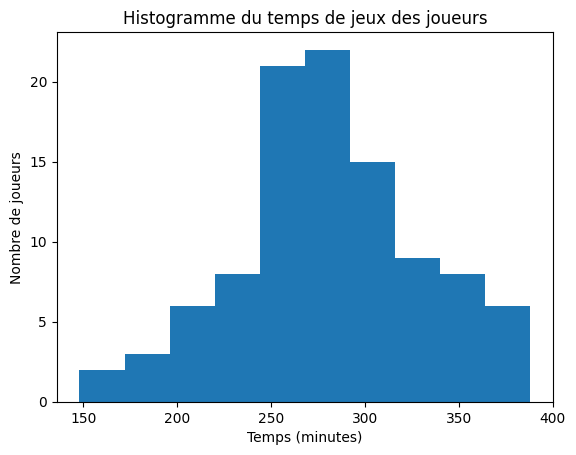

In [37]:
import matplotlib.pyplot as plt

plt.hist(file, bins=range(int(min), int(max) +24, 24))
plt.title("Histogramme du temps de jeux des joueurs")
plt.xlabel("Temps (minutes)")
plt.ylabel("Nombre de joueurs")
plt.show()

###iii)
En utilisant les tables de la distribution normale, un interval de confiance sur la moyenne a été calculée avec un niveau de confiance de 95 %

In [38]:
interval_borne_min = moyenne-1.96*std/np.sqrt(100)
interval_borne_max = moyenne+1.96*std/np.sqrt(100)
print(f'{interval_borne_min} <= u <= {interval_borne_max}')

270.7556017152397 <= u <= 290.40439828476025


### iv)
Le patron du jeu vidéo estime que le temps moyen de jeu des joueurs est d'au moins 5h (300 minutes). Afin de valider ou non cette hypothèse, un test d'hypothèse sera effectuer. On a donc:
  \begin{center}$μ_0 = 300$\end{center}
  \begin{center}$H_0 =\mu\ge\mu_0$\end{center}
  \begin{center}$H_1 = \mu < \mu_0$\end{center}
Nous utiliserons la statistique de test $Z_0 = \frac{\bar{X} - \mu_0}{ s / \sqrt n)}$ puisque la variance est connue (point i)
Afin de rejeter ou non l'hypothèse $H_0$, il suffit alors d'utiliser le Critère de rejet de $H_0$: $Z_0 < -Z_\alpha$ ou $Z_\alpha = 1.96$ avec un niveau de confiance de 95%

In [39]:
U0 = 300
#calcul de Z0
Z0 = (moyenne - U0)/(std / np.sqrt(nbEchantillons))
Za = 1.96
if Z0 < Za * -1:
    print("L'hypotèse est rejetée")
else:
    print("L'hypothèse est retenue")

L'hypotèse est rejetée


L'erreur de première espèce est la probabilité de rejeter à tort l'hypothèse émise :
\begin{center}$P(rejeter\; H_0 | H_0\;est\;vraie)$\end{center}
\begin{center}$P(\bar{X} < 300 | \mu = 300)$\end{center}
On trouve donc que l'erreur de première espèce est de 1-95% = 5%


### v)
 L'erreur de deuxième espèce est $P(Non\; rejet\; H_0 |H_0\; fausse)$ : 
 \begin{center}$P(\bar{X} >300 | \mu_0 = \bar{x})$\end{center}
 
Il faut donc trouver l'aire entre la borne inférieure et la moyenne échantionale. Afin de trouver la borne inférieure de confiance, on utilise la formule 8.8 $x-\frac{z_\alpha \sigma}{\sqrt(n)} <= \mu$ du manuel ce qui donne 291.778
\begin{center}$P(Z >\frac{291.778-280.12}{s/\sqrt(n)}) --> P(Z>2.34) = 1 - 0.990358 = 0.9642$%\end{center}


### vi)
1. $\sigma$
2. $H_0 = \sigma^2 = 50^2$
3. $H_1 = \sigma^2 \neq 50^2$
4. $X^2_0 = \frac{(n-1)s^2}{\sigma^2_0)$
5. $X^2_0 > X^2_{\alpha/2:n-1}$ ou $X^2_0 < X^2_{1-\alpha:n-1}$


In [40]:
khi0= ((nbEchantillons-1)*std**2)/50**2
khi1 = 128.418
khi2 = 73.363
if khi0 > khi1 or khi0 < khi2:
    print("Rejet H0")
else:
    print("Non rejet de H0")

Non rejet de H0


### vii)
On souhaite s'assurer que les données du fichier suivent une distribution normale. Pour se faire un test d'ajustement doit être effectué.
1. $H_0$ : Suit une distribution normale
2. $H_1$ : ne suit un distribution normale
3. $X^2_0 = \sum{ \frac{(O_i - E_i)^2}{E_i}}$
4. $X^2_0 > X^2_{\alpha:k-p-1}$

In [41]:
import scipy
SommeKhie = 0
for ligne in contenue_tableau:
    borneDroit = (ligne[2] - moyenne)/std    
    borneGauche =(ligne[1] - moyenne)/std
    O = ligne[4]
    Pi =  scipy.stats.norm.cdf(borneDroit) - scipy.stats.norm.cdf(borneGauche)
    Ei = 100 * Pi
    SommeKhie +=(O-Ei)**2/Ei
print(SommeKhie)
khi1 = 14.07
if SommeKhie > khi1:
    print("on Rejette: ne suit pas une distribution normale")
else:
    print("on ne rejette pas : Suit bien une distribution normale")

7.325358174763942
on ne rejette pas : Suit bien une distribution normale


## Mandat no 3 : Monte Carlo
### Réalisation de 10 000
Afin de déterminer les temps de branchement des joueurs, nous utiliserons la méthode de simulation monte carlo, à l'aide de la méthode de la fonction de distribution cumulative inverse. Étant donné que le temps entre chaque arrivée de joueur peut être modelisé par une variable exponentielle, on peut utiliser la fonction de densité de la distribution exponentielle.:
\begin{center} $f(x) = \lambda e^{-\lambda x}$ \end{center}
Il suffit alors d'intégrer cette fonction afin d'obtenir la CDF:
\begin{center} $F(x) = 1- e^{-\lambda x}$ \end{center}
Nous pouvons ainsi inverser la CDF pour pouvoir obtenir des valeurs de x en fonction de F(X)
\begin{center} $x = \frac{-log(1-F(X))}{\lambda}$ \end{center}
On trouve alors 10000 valeurs de x en faisant varier F(X) en utilisant des nombres aléatoires

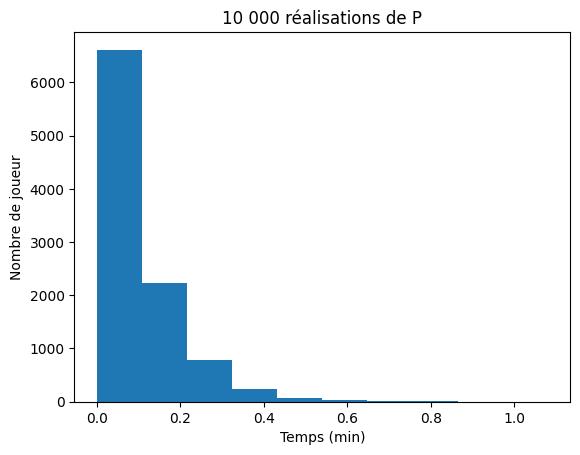

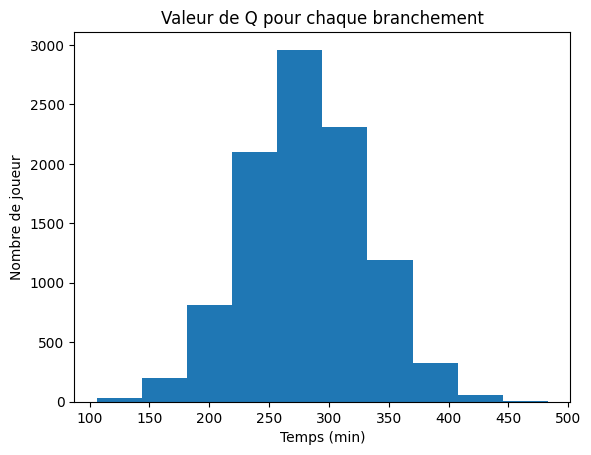

In [42]:
# Paramètres
N = 10000
lambdas = [10, 50, 100]  # Choisissez au moins 3 valeurs de λ entre 10 et 100
moyenne_Q = 280.58  # Remplacez par la moyenne réelle de la variable aléatoire Q
std_Q = 50.124481  # Remplacez par l'écart type réel de la variable aléatoire Q

# Fonction pour générer les instants de branchement des joueurs
def generate_arrival_times(N, lam):
    aleatoire = np.random.rand(N)
    return (-np.log(1 - aleatoire)) / lam

# Fonction pour générer les temps de jeu des joueurs
def generate_play_times(N, moyenne, std):
    aleatoire2 = np.random.rand(N)
    play_times = np.zeros(N)
    for i in range(len(aleatoire2)):
        if aleatoire2[i] >= 0.5:
            play_times[i] = np.sqrt(-np.log(-(aleatoire2[i] * 2 - 1)**2 + 1) / (np.sqrt(np.pi / 8))) * std + moyenne
        else:
            play_times[i] = -np.sqrt(-np.log(-(aleatoire2[i] * 2 - 1)**2 + 1) / (np.sqrt(np.pi / 8))) * std + moyenne
    return play_times

# Boucle sur différentes valeurs de λ

P = generate_arrival_times(N,lambdas[0])
plt.hist(P)
plt.title('10 000 réalisations de P')
plt.xlabel('Temps (min)')
plt.ylabel('Nombre de joueur')
plt.show()
Q = generate_play_times(N,moyenne_Q,std_Q)
plt.hist(Q)
plt.title('Valeur de Q pour chaque branchement')
plt.xlabel('Temps (min)')
plt.ylabel('Nombre de joueur')
plt.show()

En observant les histogrammes ci-dessus, l'on constate que P à bel et bien une forme exponentielle et Q une forme normale. Il reste maintenant qu'à déterminer un nombre moyen de joueurs à un temps donnée en fonction de $\lambda$

Moyenne pour lambda = 10 : 1888.592842673869
Moyenne pour lambda = 50 : 4139.205925925926
Moyenne pour lambda = 100 : 4832.26551724138


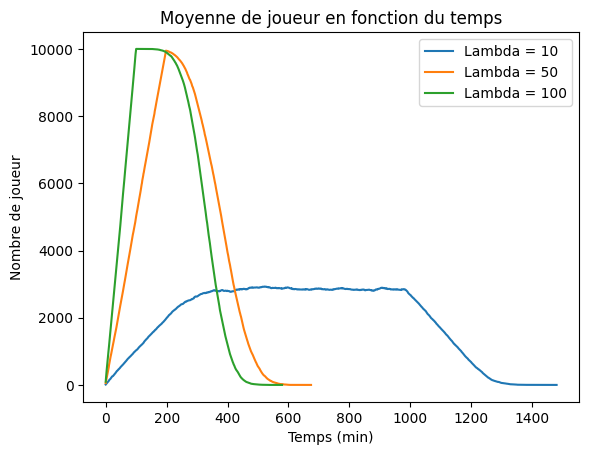

In [43]:
N = 10000
Lambda = [10, 50, 100]

for lam in Lambda:
    connection = np.zeros(int(N*np.mean(generate_arrival_times(N,lam))+moyenne+4*std))
    courant = 0.0
    for i in range(N):
        time = int(generate_play_times(1,moyenne,std)[0])
        for j in range(time):
            connection[int(np.floor(courant)+j)] += 1
    
        courant += generate_arrival_times(1, lam)[0]
    
    print(f'Moyenne pour lambda = {lam} : {np.mean(connection)}')
    plt.plot(connection)
plt.title('Moyenne de joueur en fonction du temps')
plt.xlabel('Temps (min)')
plt.ylabel('Nombre de joueur')
plt.legend(['Lambda = 10', 'Lambda = 50', 'Lambda = 100'])